In this short tutorial, we will see how to group  data using pandas and extract simple business questions.
For further reference on the groupby object check this link out https://pandas.pydata.org/pandas-docs/stable/groupby.html



The data we would be using is from a company called VanderArsdel. Taken off an excel course...



# Key findings

*   Revenue from manufacturers such as Barba, Pomum, Leo and Victoria are very dependent on the month. In fact nothing was sold until in the first and second months





*   Ontario generated the most revenue. Why is that? I suspect because the population there is highest. Could also be residents there have more buying power. We would need more data to ascertain if indeed that's the case.





*  Products in the moderation segement generated the most revenue





*  Products in the urban category generated the most revenue






* Of all manufacturers, VanArsdel had the most revenue. However, he only has 47.7% of the market share.





*  Irrespective of how the data is sliced and diced, Maximums UM-43 shows up as the most sold product 


*  Revenue from Quebec least skewed and looks resembles more a normal distribution than those from Alberta, British Colombia, Manitoba and Ontario.

 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import calendar
import seaborn as sn
import calendar
#sn.set_style("whitegrid")
sn.set_context("notebook", font_scale=1.2)
plt.style.use('fivethirtyeight')

In [2]:
Vand_Data=pd.ExcelFile('isVanArsdel.xlsx',sheetname=None)

Let's  find out the sheets that make up this data

In [3]:
Vand_Data.sheet_names

['Manufacturer',
 'Locations',
 'Products',
 'PivotTables',
 'Sales',
 'Dashboard - CA']

Lets see what the sales sheet look like. To do this, we use the parse function http://pandas.pydata.org/pandas-docs/stable/generated/pandas.ExcelFile.parse.html . Below I only show a few rows. The data actually has 1411 rows.

In [4]:

Sales = Vand_Data.parse('Sales') 

Sales.tail(7)

,ProductID,Date,Zip,Units,Revenue,Country,Product,Category,Segment,Manufacturer,State,isVanArsdel,Month,Year
1405,2365,2015-06-29,R3G,1,6356.70,Canada,Aliqui UC-13,Urban,Convenience,Aliqui,Manitoba,N,6,2015
1406,782,2015-06-30,L4X,1,1303.47,Canada,Natura RP-70,Rural,Productivity,Natura,Ontario,N,6,2015
1407,1009,2015-06-30,L5T,1,1353.87,Canada,Natura YY-10,Youth,Youth,Natura,Ontario,N,6,2015
1408,2091,2015-06-30,L5N,1,2204.37,Canada,Currus UC-26,Urban,Convenience,Currus,Ontario,N,6,2015
1409,2186,2015-06-30,K1R,1,5480.37,Canada,Victoria UC-16,Urban,Convenience,Victoria,Ontario,N,6,2015
1410,993,2015-06-30,K1R,1,4598.37,Canada,Natura UC-56,Urban,Convenience,Natura,Ontario,N,6,2015
1411,1171,2015-06-30,R3E,1,4283.37,Canada,Pirum UE-07,Urban,Extreme,Pirum,Manitoba,N,6,2015


So we have a total of 1411 rows

In [5]:
#First let's see the data types we have in our Sales dataframe

Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1412 entries, 0 to 1411
Data columns (total 14 columns):
ProductID       1412 non-null int64
Date            1412 non-null datetime64[ns]
Zip             1412 non-null object
Units           1412 non-null int64
Revenue         1412 non-null float64
Country         1412 non-null object
Product         1412 non-null object
Category        1412 non-null object
Segment         1412 non-null object
Manufacturer    1412 non-null object
State           1412 non-null object
isVanArsdel     1412 non-null object
Month           1412 non-null int64
Year            1412 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(4), object(8)
memory usage: 154.5+ KB


In [6]:
#What years make up our Year column?


Sales.Year.unique()

array([2015])

As you can see the only year we have is 2015. So for the purpose of this analysis, we will only be working with months



In [7]:
Sales=Sales.sort_values(by='Month', ascending=True)
Sales.head()

,ProductID,Date,Zip,Units,Revenue,Country,Product,Category,Segment,Manufacturer,State,isVanArsdel,Month,Year
476,636,2015-01-18,V6S,1,11118.87,Canada,Maximus UC-01,Urban,Convenience,VanArsdel,British Columbia,Y,1,2015
98,487,2015-01-15,M5R,1,13229.37,Canada,Maximus UM-92,Urban,Moderation,VanArsdel,Ontario,Y,1,2015
99,626,2015-01-15,H1G,1,17009.37,Canada,Maximus UC-91,Urban,Convenience,VanArsdel,Quebec,Y,1,2015
100,808,2015-01-16,K1R,1,4535.37,Canada,Natura RS-12,Rural,Select,Natura,Ontario,N,1,2015
582,2388,2015-01-24,V6Z,1,4031.37,Canada,Aliqui UC-36,Urban,Convenience,Aliqui,British Columbia,N,1,2015


Lets figure out how many manufactures we have

In [8]:
Sales.Manufacturer.unique(), len(Sales.Manufacturer.unique())

(array(['VanArsdel', 'Natura', 'Aliqui', 'Quibus', 'Pirum', 'Abbas',
        'Salvus', 'Pomum', 'Currus', 'Victoria', 'Leo', 'Fama', 'Barba'], dtype=object),
 13)

We have 13 of them. We might wana know the revenue generated per manufacture during the months of the year. This is easily done using groupby like so

In [9]:
R_manu=Sales.groupby(['Month','Manufacturer'])['Revenue'].sum().unstack(1)
R_manu

Manufacturer,Abbas,Aliqui,Barba,Currus,Fama,Leo,Natura,Pirum,Pomum,Quibus,Salvus,VanArsdel,Victoria
Month,,,,,,,,,,,,,
1,37059.12,37902.69,NaN,26330.22,5528.25,29986.11,92432.34,117194.49,15936.48,53411.40,2298.24,359789.85,13795.74
2,36666.00,84852.18,NaN,31874.85,27461.70,NaN,199683.54,91338.66,NaN,31363.92,2581.74,730743.93,NaN
3,47023.20,174658.05,15749.37,162080.73,32432.40,NaN,324051.21,332817.03,5857.74,40997.88,3337.11,1042501.95,23811.48
4,19404.00,156954.42,61043.85,91148.40,25067.70,31372.11,337202.46,317917.53,14866.11,65249.73,2077.74,1070163.99,41386.59
5,44852.85,210828.87,15434.37,69860.07,39047.40,56570.85,253956.15,167209.56,16061.85,128729.79,14610.33,760765.32,7433.37
6,35409.15,183139.74,23686.74,104002.29,7556.85,11339.37,229723.20,204155.91,15935.85,9951.48,7115.22,730441.53,10960.74


I could obtain the same result above using the pivot table method. I can even go further and ask for the sum across rows and columns of the resulting pivot table

In [10]:
Sales.pivot_table(index="Month", columns=["Manufacturer"],values="Revenue",aggfunc=np.sum,margins=True,margins_name='Sum')

Manufacturer,Abbas,Aliqui,Barba,Currus,Fama,Leo,Natura,Pirum,Pomum,Quibus,Salvus,VanArsdel,Victoria,Sum
Month,,,,,,,,,,,,,,
1,37059.12,37902.69,NaN,26330.22,5528.25,29986.11,92432.34,117194.49,15936.48,53411.40,2298.24,359789.85,13795.74,791664.93
2,36666.00,84852.18,NaN,31874.85,27461.70,NaN,199683.54,91338.66,NaN,31363.92,2581.74,730743.93,NaN,1236566.52
3,47023.20,174658.05,15749.37,162080.73,32432.40,NaN,324051.21,332817.03,5857.74,40997.88,3337.11,1042501.95,23811.48,2205318.15
4,19404.00,156954.42,61043.85,91148.40,25067.70,31372.11,337202.46,317917.53,14866.11,65249.73,2077.74,1070163.99,41386.59,2233854.63
5,44852.85,210828.87,15434.37,69860.07,39047.40,56570.85,253956.15,167209.56,16061.85,128729.79,14610.33,760765.32,7433.37,1785360.78
6,35409.15,183139.74,23686.74,104002.29,7556.85,11339.37,229723.20,204155.91,15935.85,9951.48,7115.22,730441.53,10960.74,1573418.07
Sum,220414.32,848335.95,115914.33,485296.56,137094.30,129268.44,1437048.90,1230633.18,68658.03,329704.20,32020.38,4694406.57,97387.92,9826183.08


Let's visualize the result of the groupby. 

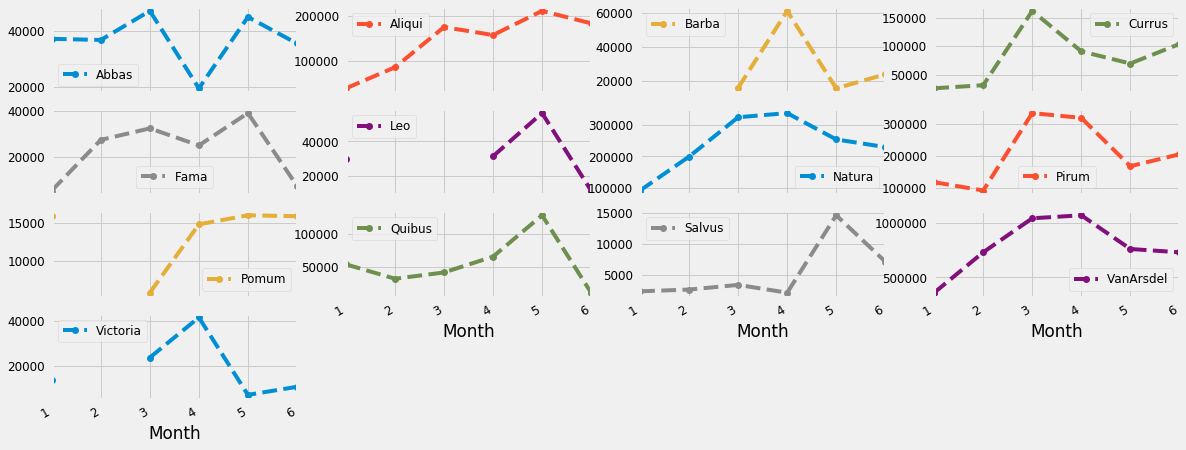

In [11]:

R_manu.plot(kind='line',subplots=True,layout=(4,4),figsize=(18,8),legend=True,linestyle='--', marker='o') 

plt.show()

VanArsdel and  Natura seem to have the same trend of sales. Leo only started selling in the fourth month. This could be because it highly dependent on the weather at the time. Abbas sees a sharp decrease and has the lowest revenue in the 4th month.  We can tweak the graph above to make it more pleasant, but I will leave that for another tutorial


The plot method avaiable in the groupby made it really easy. Compare the one line code of the above to the one below




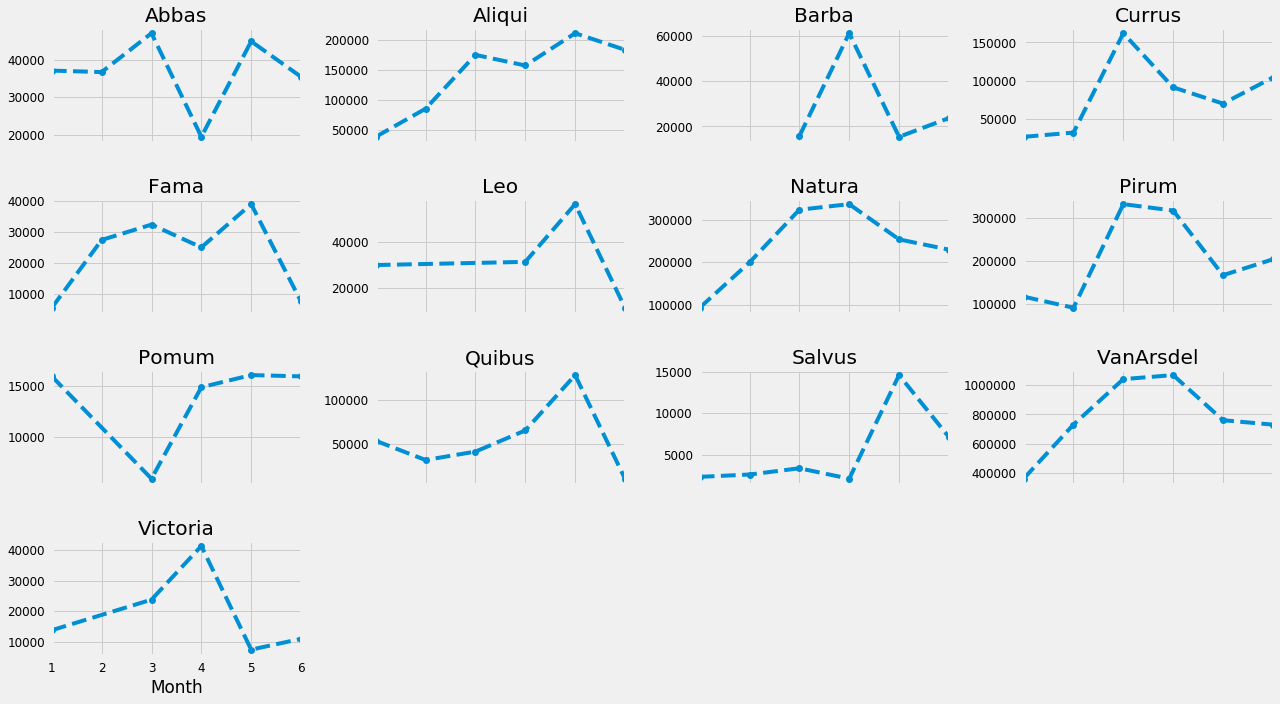

In [12]:
plt.figure(figsize=(18,18), facecolor='white')
fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True, sharey=False, figsize=(18,10))
axes_list = [item for sublist in axes for item in sublist] 

for manufactuername, selection in Sales.groupby("Manufacturer"):
        ax = axes_list.pop(0)
        selection.groupby(['Month'])['Revenue'].sum().plot(label=manufactuername, legend=False,linestyle='--', marker='o',ax=ax)
        ax.set_title(manufactuername)
for ax in axes_list:
    ax.remove()
    
    
plt.tight_layout()
plt.subplots_adjust(hspace=.5)    
        

Other than the ability to fully customize the graphs, another  advantage I think about plotting this way is that you have full control of what happens to the axis. You can easily customize the axis to whatever you need. E.g

ax.set_xlim(( ))

ax.set_xlabel("")

ax.set_xticks(())

ax.spines['left'].set_visible(False)

ax.spines['top'].set_visible(False)

ax.spines['right'].set_visible(False)

It makes sense to know the revenue generated per state.  We could easily do this by grouping the data  and calling the plot method on the groupby object

In [13]:
Sales.groupby(['State','isVanArsdel'])['Revenue'].sum().unstack(1)

isVanArsdel,N,Y
State,,
Alberta,1547543.34,1415615.04
British Columbia,996666.93,1111471.83
Manitoba,728141.40,651176.82
Ontario,1733048.10,1382179.68
Quebec,126376.74,133963.20


Lets visualize it

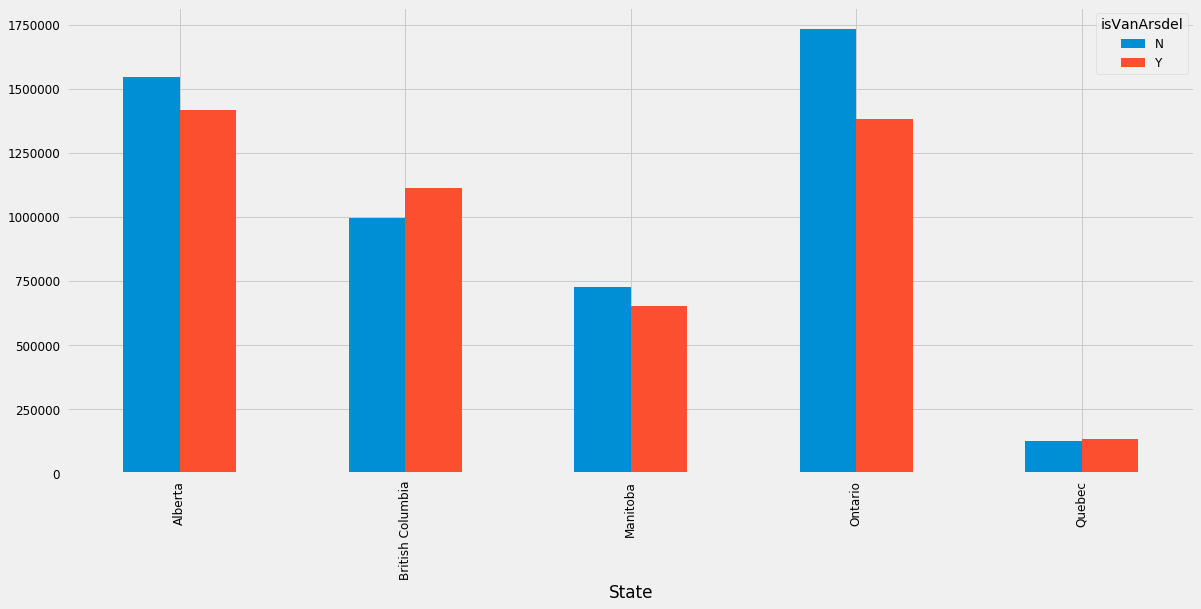

In [14]:
 
    
Sales.groupby(['State','isVanArsdel'])['Revenue'].sum().unstack(1).plot(kind='bar',figsize=(18,8))



Again like before, the above table can be generated using the pivot_table method. The graph could also be further customized using the matplotlibs object oriented plotting. For example, you may chose flip the xlabels like so

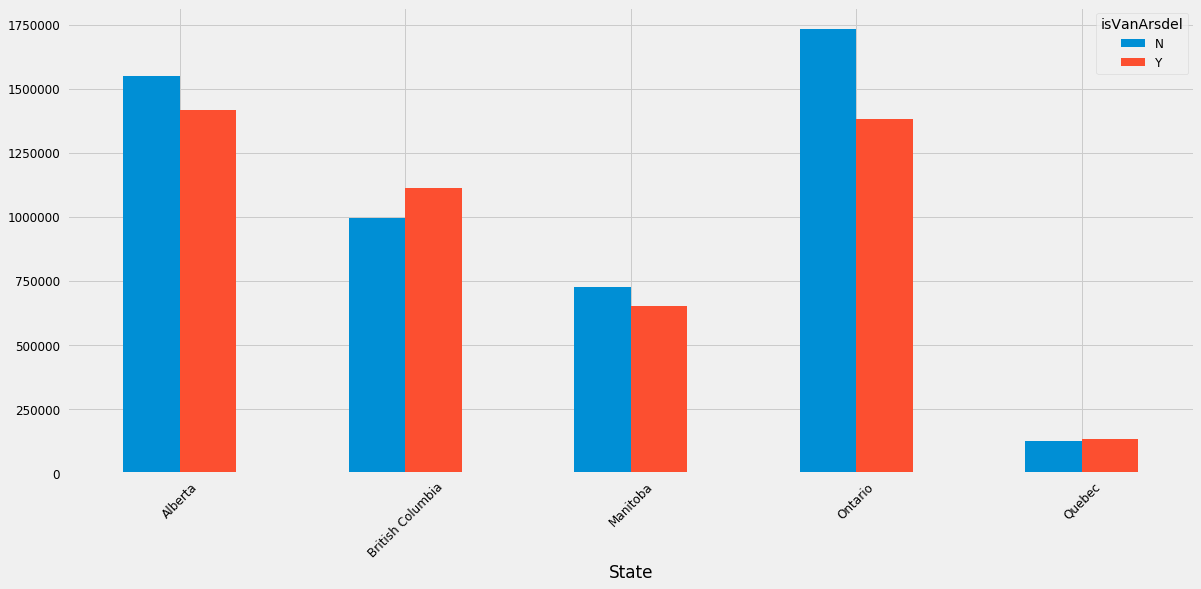

In [15]:
fig, ax=plt.subplots()

Sales.groupby(['State','isVanArsdel'])['Revenue'].sum().unstack(1).plot(kind='bar',figsize=(18,8),ax=ax)

for tick in ax.get_xticklabels():
    tick.set_rotation(45)

Clearly, quebec had the least revenue while Ontario had the most revenue. It would be worthwhile to look into what products accounted for the revenue seen in these two provinces.


\



\


\













Another interesting thing to look at is the revenue by segment. Recall the products are in different categories


In [143]:
Sales.groupby('Segment').size()

Segment
All Season       43
Convenience     403
Extreme         242
Moderation      304
Productivity    246
Regular          31
Select           49
Youth            94
dtype: int64

We see that Urban accounts for most of the products in the category. 

In [16]:
Sales.groupby(['Segment','isVanArsdel'])['Revenue'].sum().unstack(1)

isVanArsdel,N,Y
Segment,,
All Season,204985.62,NaN
Convenience,1368672.48,1581585.39
Extreme,1465621.92,83817.72
Moderation,874235.88,3009316.59
Productivity,673778.70,NaN
Regular,161355.60,NaN
Select,181307.07,19686.87
Youth,201819.24,NaN


Let's generate a horizontal barplot

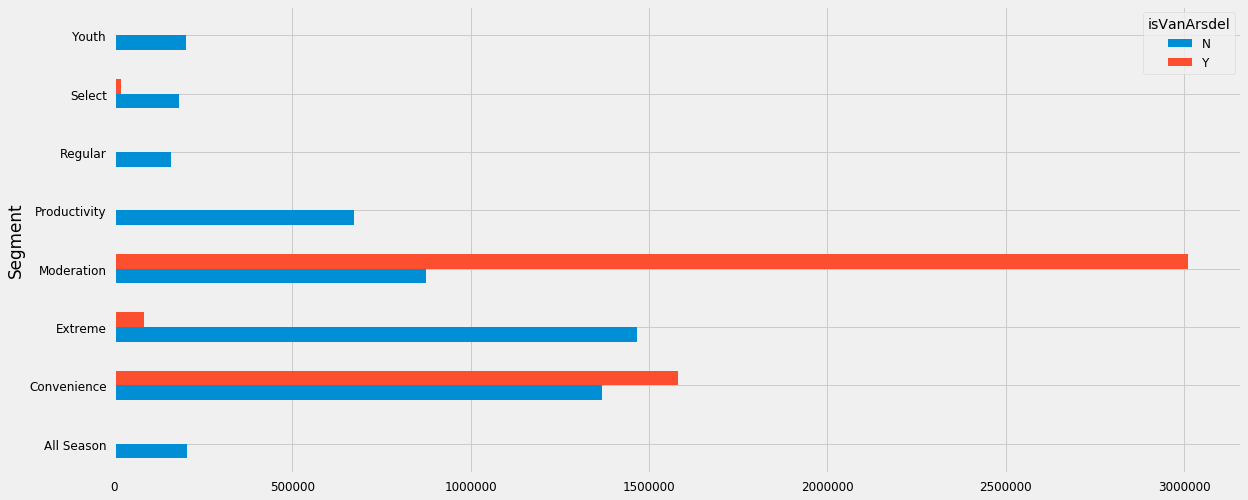

In [17]:
Sales.groupby(['Segment','isVanArsdel'])['Revenue'].sum().unstack(1).plot(kind='barh',figsize=(18,8))

As before, passing the keyword arg ax in the plot the plot can be further customized and made to look more appealing

Moderation had the most sales while select had the least revenue. Doing some filterig on the data, one can actually drill down to see in which province did products in the moderation segment sell the most



Moderation has the most revenue. But which state contributed most to the revenue? We can get this info in two steps.
Firstly, by filtering and then doing a groupby


Text(0.5,1,'Revenue by State in the Moderation Segment')

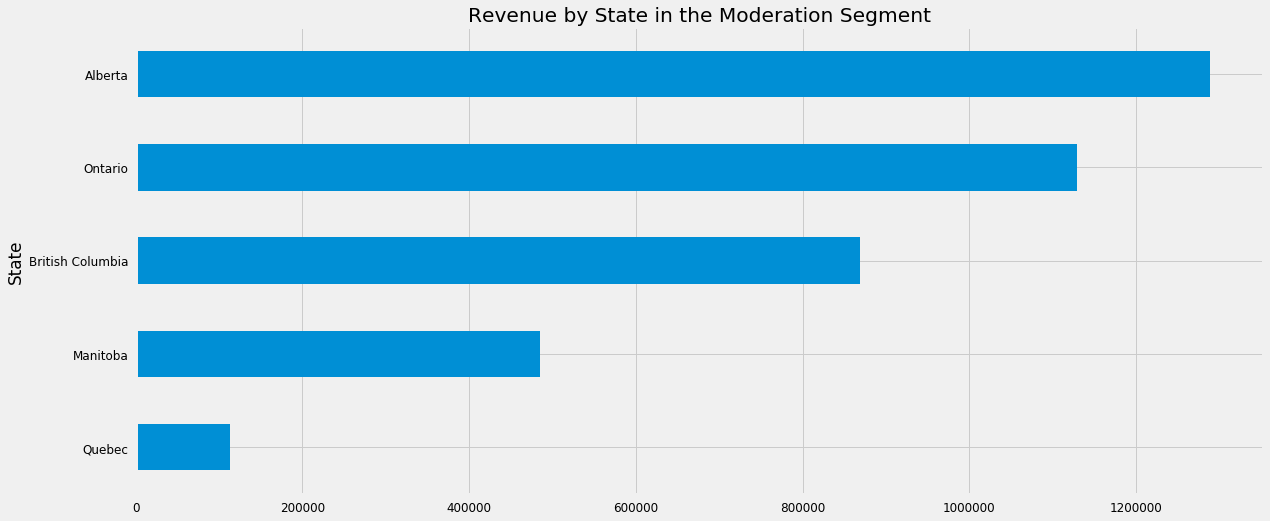

In [18]:
#St_MRM= State with most revenue moderation

St_MRM = Sales[Sales['Segment']=='Moderation'] 
         
St_MRM.groupby(['State'])['Revenue'].sum().sort_values().plot(kind='barh',figsize=(18,8))
plt.title('Revenue by State in the Moderation Segment')

From the chart, we see that Alberta is the top earner in this category closely followed by Ontario.


\



\



\



\



















A similar graph showing the revenue per segment as shown below  can be obtained with seaborn using a factor plot. Read more here https://seaborn.pydata.org/generated/seaborn.factorplot.html#seaborn.factorplot. However, note that the difference between both graphs. Notice that select has the highest revenue one which is not the case in the other. Can you tell figure out why? hint: Look at the numbers on the revenue scales on both graphs

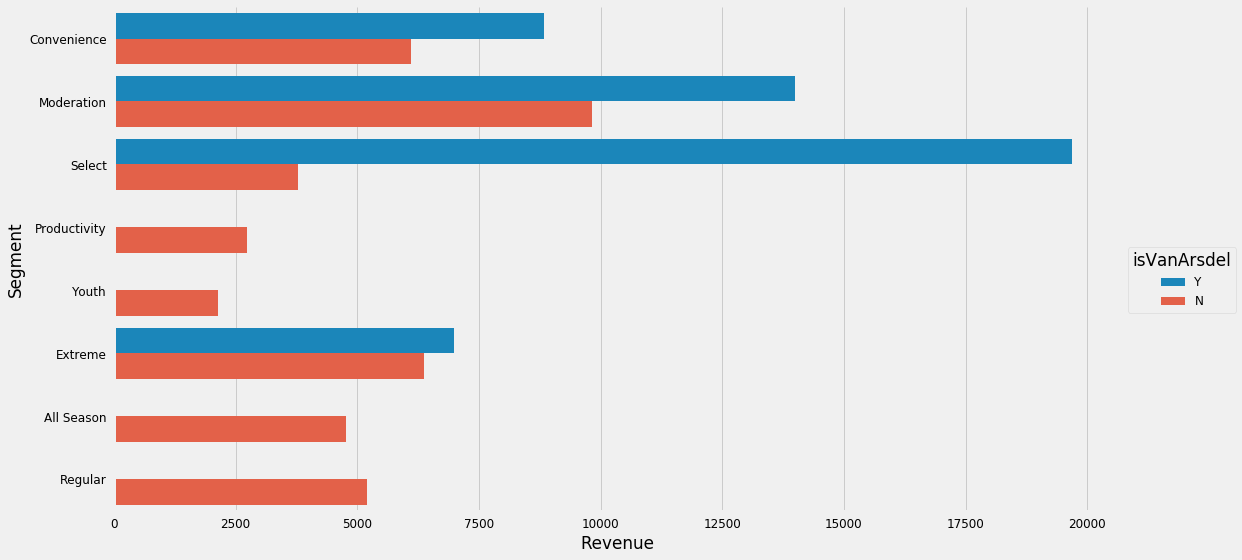

In [19]:
g=sn.factorplot(x="Revenue", y="Segment",hue="isVanArsdel",data=Sales,kind="bar",size=8, aspect=2,orient="h",ci=None)
g.set_ylabels("Segment")
g.set_xlabels("Revenue")

What does the revenue look like by category?


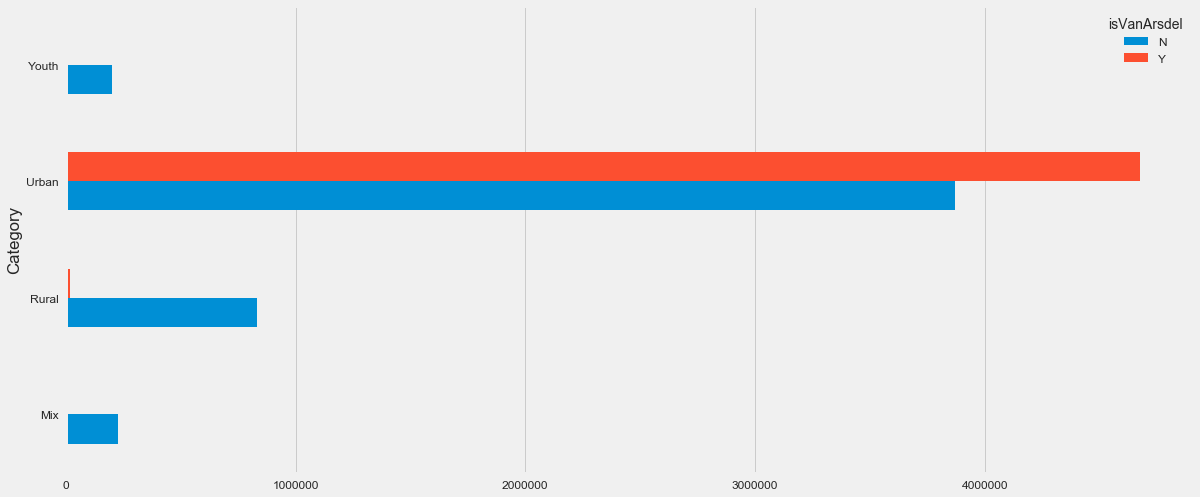

In [214]:
fig,ax=plt.subplots()
Sales.groupby(['Category','isVanArsdel'])['Revenue'].sum().unstack(1).plot(kind='barh',figsize=(18,8),ax=ax)
ax.grid(axis='y')

Urban category did generated the most revenue with products from isVanArsdel slightly more than those from other manufacturers. This plot can be given a custometic touch.

As before, I would like to know which state is the top earner in the urban category?


Text(0.5,1,'Revenue by State in the Urban Category')

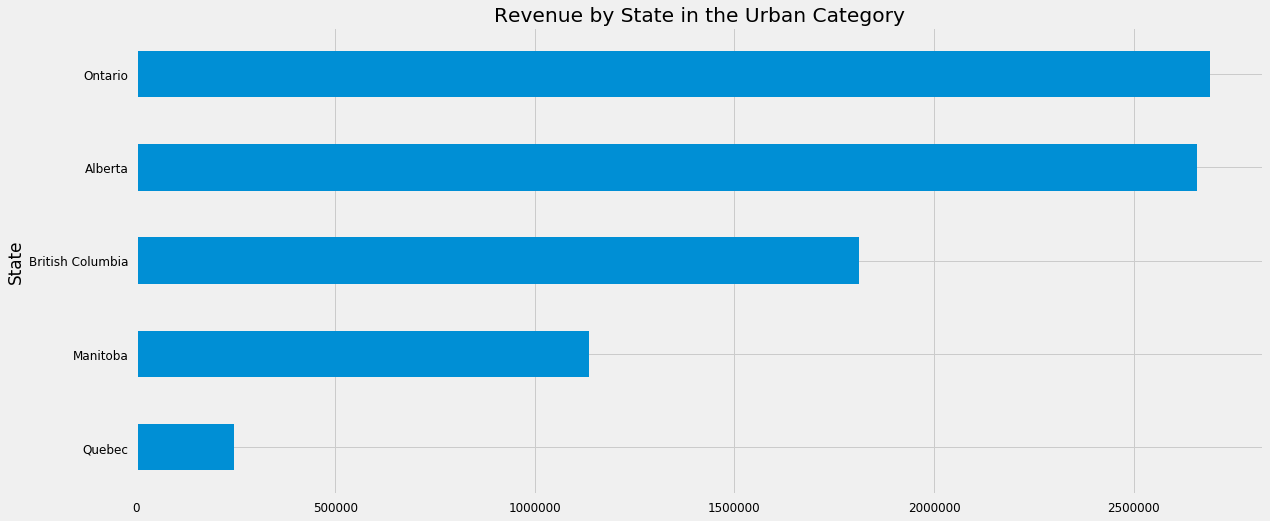

In [20]:
#St_MRC= State with most revenue category

St_MRC = Sales[Sales['Category']=='Urban'] 
         
St_MRC.groupby(['State'])['Revenue'].sum().sort_values().plot(kind='barh',figsize=(18,8))
plt.title('Revenue by State in the Urban Category')

This time Ontario has the most sales very closely followed by Alberta. Recall Alberta had the lead in the moderation category. I think it is worthwhile to actually see the numbers.


In [21]:
St_MRC.groupby(['State'])['Revenue'].sum().sort_values(ascending=False)

State
Ontario             2690411.85
Alberta             2658324.69
British Columbia    1812981.87
Manitoba            1135774.08
Quebec               247113.09
Name: Revenue, dtype: float64

\


\


\


As a buisness owner,  I would love to see which of the products I distribute in Canada generate the most sales. Again, we use the groupby. 


In [22]:
Sales.groupby('Manufacturer')['Revenue'].sum().sort_values()

Manufacturer
Salvus         32020.38
Pomum          68658.03
Victoria       97387.92
Barba         115914.33
Leo           129268.44
Fama          137094.30
Abbas         220414.32
Quibus        329704.20
Currus        485296.56
Aliqui        848335.95
Pirum        1230633.18
Natura       1437048.90
VanArsdel    4694406.57
Name: Revenue, dtype: float64

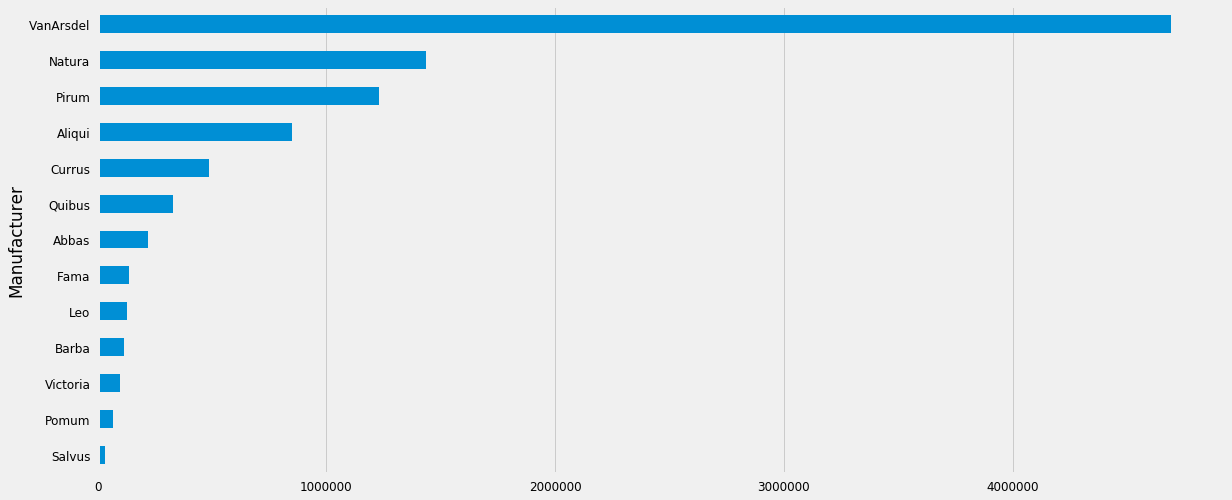

In [5]:
fig,ax=plt.subplots()
Sales.groupby('Manufacturer')['Revenue'].sum().sort_values().plot(kind='barh',figsize=(18,8),ax=ax)
ax.grid(axis='y')

VanArsdel has a revenue the most revenue. It has just over three times more revenue than its closest rival-Natura

Recall that VanArsdel is the name of the company which also  manufacture products of their own. I think the company's board of directors would be very pleased that their own products are doing extremely well

Let's determine which categories did

\


\


\


\



Let's see what the percentage share of the market does VanArsdel have.


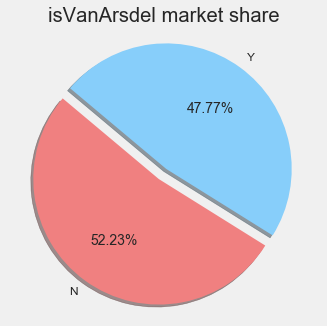

In [251]:
fig,ax=plt.subplots(figsize=(5,5))
labels=['N',"Y"]
ax.pie(Sales.groupby('isVanArsdel')['Revenue'].sum(),labels=labels,   autopct='%1.2f%%',colors=colors,explode=explode,shadow=True,
       startangle=140)
plt.axis('equal')
plt.title('isVanArsdel market share')
plt.show()

From the pie chart, we see that isVanArsdel doesnt have full control of the market. He only has 47.7% of revenue. This may be a call to action for the board of directors to see that this share goes beyond the current value.

N stands for No and Y for Yes. Again, it is best to have a visualization.

\



\



\

Recall we had a bar chart showing the revenue in the segment and category divisions. Now lets see the top 10 products across the all board and across both these product subdivisions. 






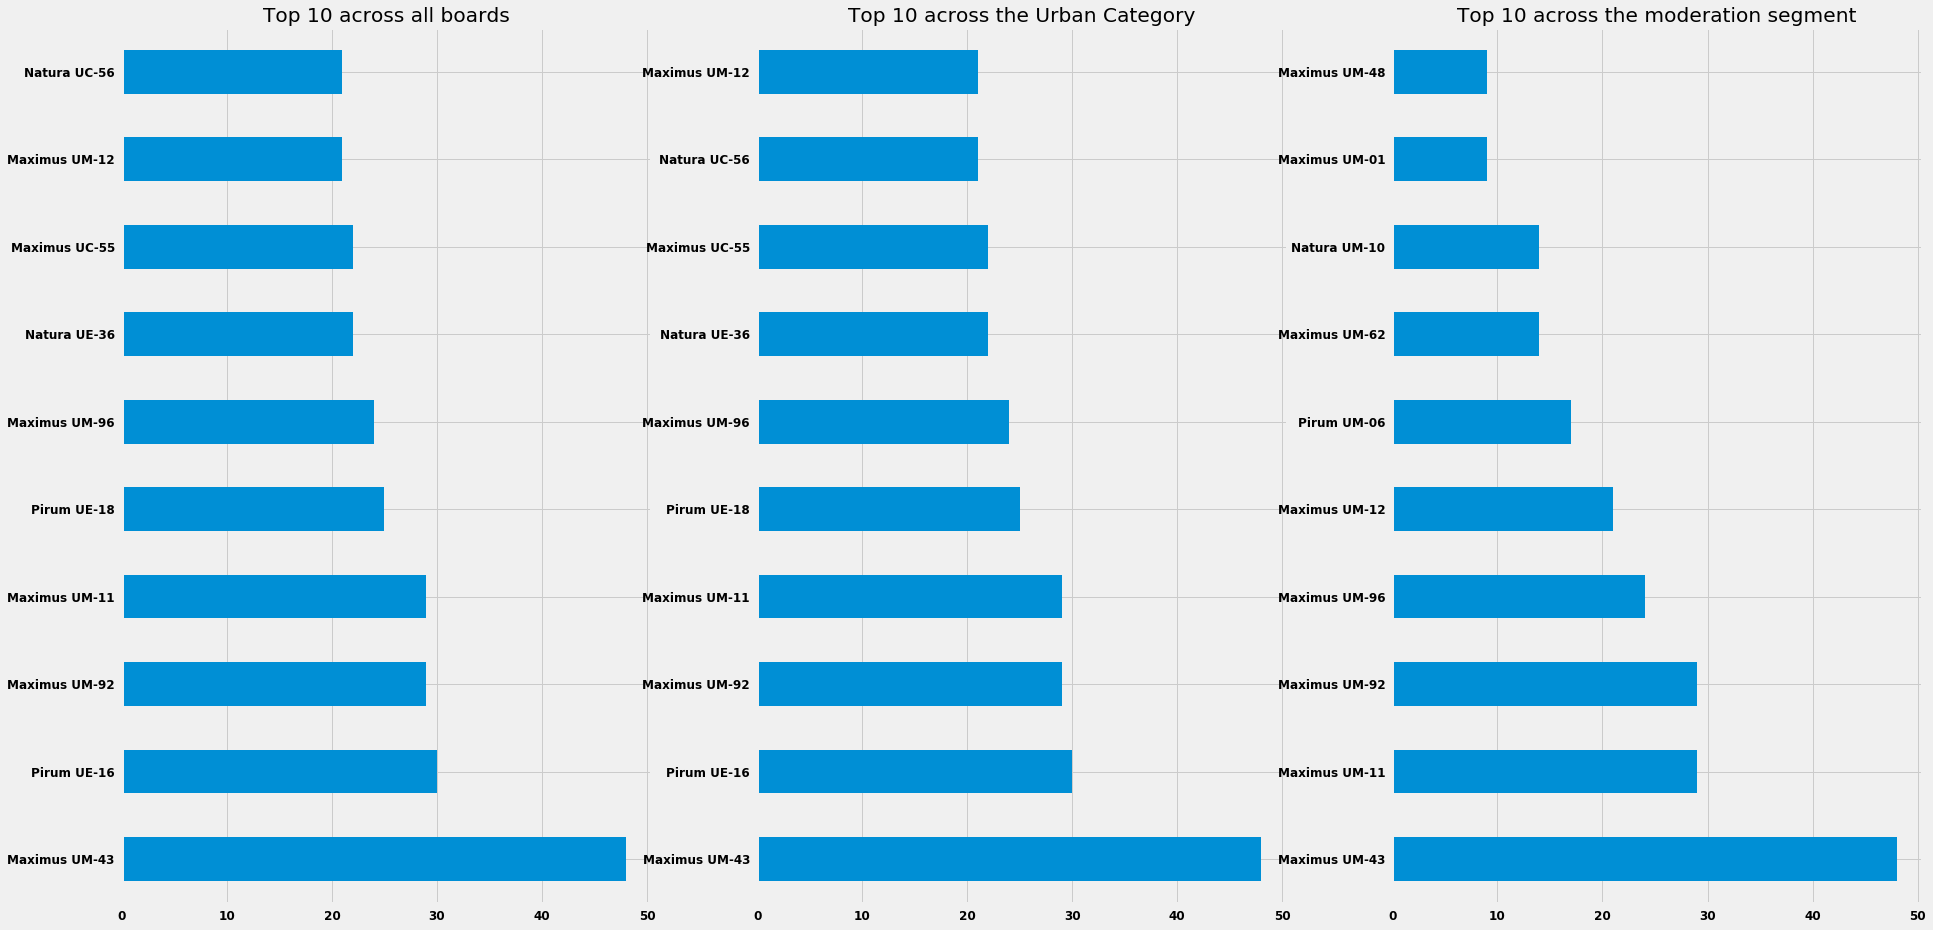

In [60]:
#plt.subplots_adjust(left=0.5, bottom=None, right=1, top=None, wspace=2, hspace=None)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.figure(figsize=(50,15))

ax1 = plt.subplot(1, 3, 1)


ax2 = plt.subplot(1, 3, 2)


ax3=plt.subplot(1,3,3)


Sales.Product.value_counts().head(10).plot(kind='barh',ax=ax1)
ax1.set_title('Top 10 across all boards')

Urban=Sales[Sales.Category=='Urban']
Urban.Product.value_counts().head(10).plot(kind='barh',ax=ax2)
ax2.set_title('Top 10 across the Urban Category')





Moderation=Sales[Sales.Segment=='Moderation']
Moderation.Product.value_counts().head(10).plot(kind='barh',ax=ax3)
ax3.set_title('Top 10 across the moderation segment')

plt.subplots_adjust(left=0.5, bottom=None, right=1, top=None, wspace=0.2, hspace=None)
#plt.tight_layout()





Interestingly Maximums UM-43 is the most sold product common to all. In general, this doesn't mean that it is responsible for the most revenue.  Maximums UM-92, the third product from the bottom is the next most sold product common to all. You will notice that the top 10 products in the  urban category are present in top 10 across all boards. Looking closing, this is not the case in the moderation segment. 



\



\



\


\


One final thing, instead of manually inspecting  the chart above to figure out products that are common and not common to both, we can use a pandas  feature called .reindex_like(). See the documentation here https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reindex_like.html  Lets see how this works.

In [61]:
Urban=Sales[Sales.Category=='Urban']
Urban_top10=Urban.Product.value_counts().head(10)


Moderation=Sales[Sales.Segment=='Moderation']
Moderation_top10=Moderation.Product.value_counts().head(10)


 First we reindex such Urban_top10 such that the indexes matches Moderation_top10. Then we make the comparsion.

In [62]:
Urban_top10.reindex_like(Moderation_top10)==Moderation_top10

Maximus UM-43     True
Maximus UM-11     True
Maximus UM-92     True
Maximus UM-96     True
Maximus UM-12     True
Pirum UM-06      False
Maximus UM-62    False
Natura UM-10     False
Maximus UM-01    False
Maximus UM-48    False
Name: Product, dtype: bool

It's interesting to observe that the first five products are common to both and the last five are not. More like 50-50. You can also compare top10 across all boards with Urban_top10 and Moderation_top10

# Basic stats on revenue

In [67]:
Sales['Revenue'].describe()

count     1412.000000
mean      6959.053173
std       4495.953698
min        723.870000
25%       3936.870000
50%       6173.370000
75%      10079.370000
max      22994.370000
Name: Revenue, dtype: float64

You can read more on the meaning of these descriptors here https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html

Lets take a look at the distribution of revenues by state

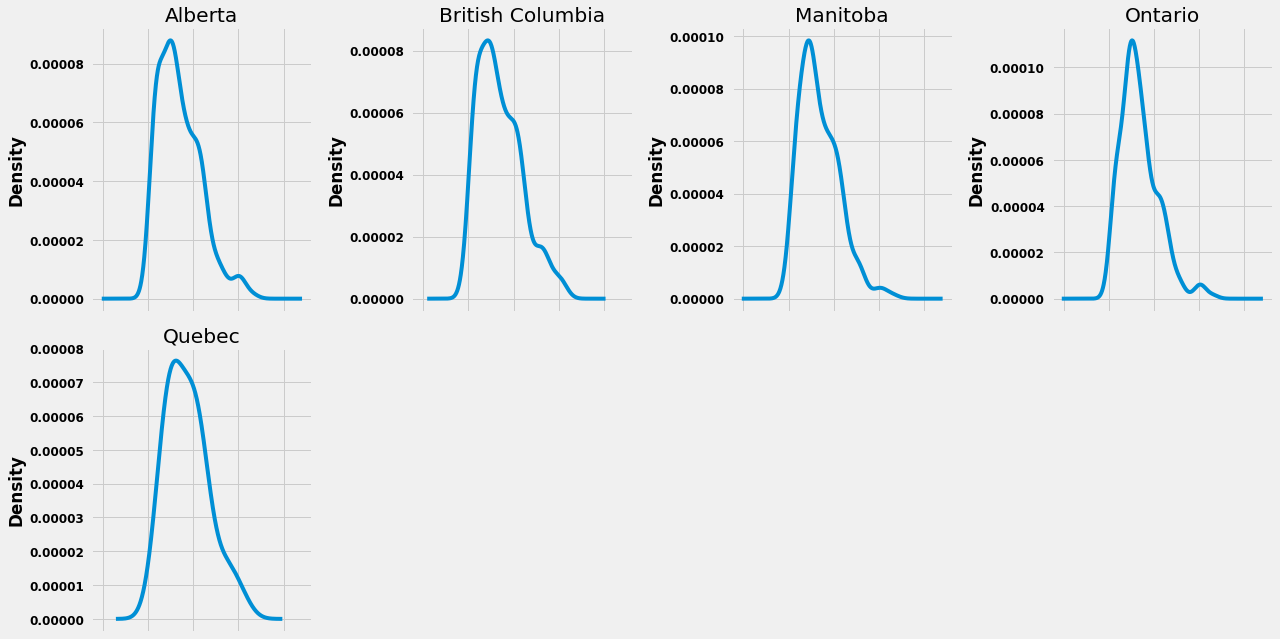

In [68]:
fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True, sharey=False, figsize=(18,18))
axes_list = [item for sublist in axes for item in sublist] 
for state, selection in Sales.groupby('State'):
    ax=axes_list.pop(0)
    selection['Revenue'].plot(kind='kde',label=state,legend=False,ax=ax)
    ax.set_title(state)
for ax in axes_list:
    ax.remove()
    
plt.tight_layout() 

What we observe is that all provinces at the top are more skewed than Quebec. If this dataset were to be used in a machine learning problem, there will be need for them to be transformed to look more like a normal distribution. Details of why you would want a normal distribution for a machine learning problem will be covered in another tutorial.

We can overaly the plots for easy comparison.


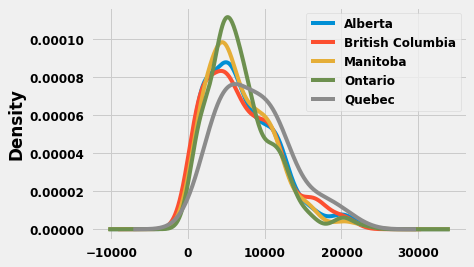

In [69]:
for state, selection in Sales.groupby('State'):
    selection['Revenue'].plot(kind='kde',legend=True,label=state)

It is even more clearler to see that Quebec has the broadest distribution and least skewed. 